Загружаем данные

In [51]:
import numpy as np
import pandas as pd

In [291]:
train = pd.read_csv(r'C:/Users/HP/Notebooks/DataSets/train_twitter.csv')
test = pd.read_csv(r'C:/Users/HP/Notebooks/DataSets/test_twitter.csv')

In [10]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [292]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


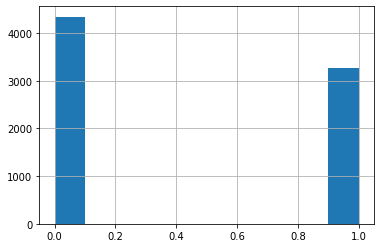

In [46]:
train.target.hist()

# UnderSampling

In [49]:
true_count = len(train[train.target == 1])

In [48]:
false_indices = train[train.target == 0].index

In [52]:
random_indices = np.random.choice(false_indices, true_count, replace=False)

In [53]:
true_indeces = train[train.target == 1].index

In [55]:
us_train_indeces = np.concatenate([true_indeces,random_indices])

In [56]:
us_train = train.loc[us_train_indeces]

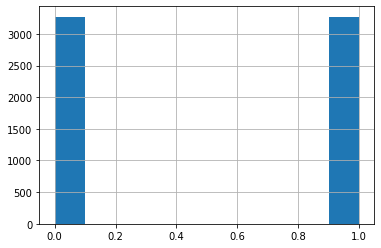

In [58]:
us_train.target.hist()

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [60]:
us_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6542 entries, 0 to 756
Data columns (total 5 columns):
id          6542 non-null int64
keyword     6488 non-null object
location    4358 non-null object
text        6542 non-null object
target      6542 non-null int64
dtypes: int64(2), object(3)
memory usage: 306.7+ KB


# 1

In [64]:
data = us_train.text
target = us_train.target

In [293]:
test_data = test.text

## CountVectorizer

In [110]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer(max_df=1, min_df=1)
matrix = vectorizer.fit_transform(data, target)

In [111]:
print(matrix.shape)

(6542, 13453)


In [114]:
matrix_test = vectorizer.fit_transform(test_data)

### KMeans

In [116]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state=42)
kmeans.fit(matrix.toarray())
pred = kmeans.fit_predict(matrix.toarray())

In [117]:
from  sklearn.metrics  import accuracy_score

print(accuracy_score(target, pred))

0.5001528584530724


In [118]:
pred1 = kmeans.fit_predict(matrix_test.toarray())

### SVD + KMeans

In [119]:
from sklearn.decomposition import TruncatedSVD

kmeans_model = KMeans(n_clusters=2, random_state=42)
svd = TruncatedSVD(n_components=100, random_state=42)
features = svd.fit_transform(matrix)
kmeans_model.fit(features)
pred = kmeans.fit_predict(features)

In [120]:
print(accuracy_score(target, pred))

0.5001528584530724


In [121]:
pred2 = kmeans.fit_predict(matrix_test.toarray())

## TfidfVectorizer

In [122]:
vectorizer = TfidfVectorizer(max_df=500, min_df=50)
matrix = vectorizer.fit_transform(data, target)

In [123]:
print(matrix.shape)

(6542, 196)


In [124]:
matrix_test = vectorizer.fit_transform(test_data)

### KMeans

In [131]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state=42)
kmeans.fit(matrix.toarray())
pred = kmeans.fit_predict(matrix.toarray())

In [132]:
print(accuracy_score(target, pred))

0.5174258636502599


In [133]:
pred3 = kmeans.fit_predict(matrix_test.toarray())

### SVD + KMeans

In [134]:
kmeans_model = KMeans(n_clusters=2, random_state=42)
svd = TruncatedSVD(n_components=100, random_state=42)
features = svd.fit_transform(matrix)
preds = kmeans_model.fit(features)
preds = kmeans_model.fit_predict(features)

In [135]:
print(accuracy_score(target, preds))

0.48822989911342096


In [136]:
pred4 = kmeans.fit_predict(matrix_test.toarray())

# 2

In [137]:
us_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [167]:
df1 = us_train.fillna('none', axis=0)

In [168]:
df1.head()

,id,keyword,location,text,target
0,1,none,none,Our Deeds are the Reason of this #earthquake M...,1
1,4,none,none,Forest fire near La Ronge Sask. Canada,1
2,5,none,none,All residents asked to 'shelter in place' are ...,1
3,6,none,none,"13,000 people receive #wildfires evacuation or...",1
4,7,none,none,Just got sent this photo from Ruby #Alaska as ...,1


In [169]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
def categoric(data):
    categorical_columns = data.columns[data.dtypes == 'object']
    for column in categorical_columns:
        data[column] = le.fit_transform(data[column])
    return data

In [141]:
from sklearn import preprocessing
def standart(data):
    for column in data.columns:
        data[column] = preprocessing.scale(data[column])
    return data;

In [170]:
df1 = categoric(df1)

In [171]:
df1.head()

,id,keyword,location,text,target
0,1,147,2722,4348,1
1,4,147,2722,2903,1
2,5,147,2722,1966,1
3,6,147,2722,583,1
4,7,147,2722,3726,1


In [190]:
df1 = standart(df1)

In [191]:
df1.head()

,id,keyword,location,text,target
0,-1.753934,0.56039,0.951146,0.605854,1.0
1,-1.752976,0.56039,0.951146,-0.168815,1.0
2,-1.752656,0.56039,0.951146,-0.671144,1.0
3,-1.752337,0.56039,0.951146,-1.412575,1.0
4,-1.752018,0.56039,0.951146,0.272397,1.0


In [194]:
test1 = test_data[['keyword', 'location', 'text']]

test1 = categoric(test1)
test1 = standart(test1)

In [177]:
test1

array([1866, 1544, 3197, ..., 1509, 1937,   37])

In [178]:
x = np.array(df1['text'])
y = df1.target

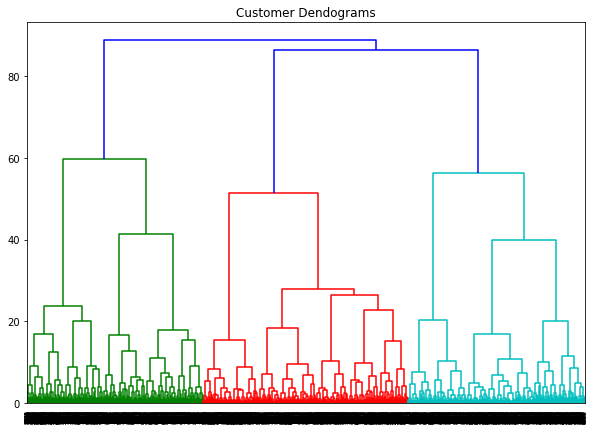

In [148]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(x, method='ward'))

In [192]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit_transform(x.reshape(-1,1), y)
pred = kmeans.predict(x.reshape(-1,1))

In [193]:
print(accuracy_score(target, pred))

0.49235707734637724


In [195]:
pred5 = kmeans.predict(test1.reshape(-1,1))

## DBSCAN

In [204]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=26)
dbscan.fit(x.reshape(-1,1), y)

DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=26, n_jobs=None, p=None)

In [205]:
pred = dbscan.labels_

for i in range(len(pred)):
    if pred[i] == -1:
        pred[i] = 1
    else:
        pred[i] = 0

In [206]:
print(accuracy_score(target, dbscan.labels_))

0.5


In [211]:
pred6 = dbscan.fit_predict(test1.reshape(-1, 1))

# 3

In [218]:
X_train = train.text
y_train = train.target

X_test = test

In [219]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(7613, 21637) (3263, 21637)


In [222]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [223]:
predicted = clf.predict(train_vectors)

In [224]:
print(accuracy_score(y_train,predicted))

0.8853277288848023


In [225]:
pred7 = clf.predict(test_vectors)

In [281]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
words = {':', '.', ',', '(', ')', '—', '«', '»', '!', '?', '-', "''", ';', '--', '``',
            '[', ']', '{', '}', '*', '...', '↑', '//'}
stop_words.update(words)

twits = train.text
words = []
for i in range(len(twits)):
    tokens = word_tokenize(train.text[i])
    tokens = [w for w in tokens if not w in stop_words]
    #tokens = nltk.bigrams(tokens)
    frequency_dist = nltk.FreqDist(tokens).most_common(15)
    words.append(frequency_dist)

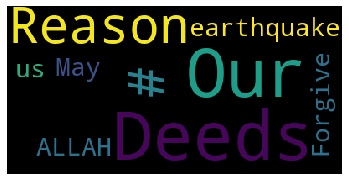

In [261]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate_from_frequencies(words[0])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

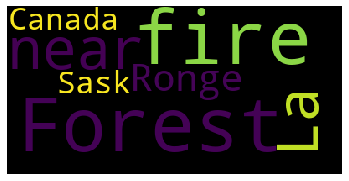

In [262]:
wordcloud = WordCloud().generate_from_frequencies(words[1])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [282]:
for i in range(len(words)):
    str = ''
    for j in range(len(words[i])):
        str = '{0}; {1}'.format(str, words[i][j][0])
    words[i] = str

In [284]:
words[0]

'; Our; Deeds; Reason; #; earthquake; May; ALLAH; Forgive; us'

In [303]:
test_twits = test.text
words_test = []
for i in range(len(test_twits)):
    tokens = word_tokenize(test.text[i])
    tokens = [w for w in tokens if not w in stop_words]
    #tokens = nltk.bigrams(tokens)
    frequency_dist = nltk.FreqDist(tokens).most_common(15)
    words_test.append(frequency_dist)

In [305]:
for i in range(len(words_test)):
    str = ''
    for j in range(len(words_test[i])):
        str = '{0}; {1}'.format(str, words_test[i][j][0])
    words_test[i] = str

In [307]:
X_train = words
y_train = train.target

X_test = words_test

In [308]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(7613, 20374) (3263, 20374)


In [309]:
clf = MultinomialNB().fit(train_vectors, y_train)

In [310]:
predicted = clf.predict(train_vectors)
print(accuracy_score(y_train,predicted))

0.8995139892289504


In [311]:
pred8 = clf.predict(test_vectors)

In [319]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim
import pymorphy2

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
pymorphy = pymorphy2.MorphAnalyzer()

In [315]:
train_data = train.text.tolist()

In [316]:
test_data = test.text.tolist()

In [359]:
data_words = []
for i in range(len(train)):
    tokens = word_tokenize(train.text[i])
    data_words.append(tokens)

In [360]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

print(trigram_mod[bigram_mod[data_words[0]]])

['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', '#', 'earthquake', 'May', 'ALLAH', 'Forgive', 'us', 'all']


In [361]:
def remove_stopwords(texts):
    return [[w for w in tokens if not w in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts):
    texts_out = []
    for sent in texts:      
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc])
    return texts_out

In [362]:
data_words_nostops = remove_stopwords(data_words)

data_words_bigrams = make_bigrams(data_words_nostops)

In [363]:
from spacy.lang.en import English

In [367]:
nlp = English()
data_lemmatized = lemmatization(data_words_bigrams)
print(data_lemmatized[:1])

[['The_Latest', 'More_Homes', 'Razed', 'Northern_California', 'Wildfire', 'ABC_News', 'http', '//t.co', '/', 'YmY4rSkQ3d']]


In [369]:
for i in range(len(data_lemmatized)):
    str = ''
    for j in range(len(data_lemmatized[i])):
        str = '{0}; {1}'.format(str, data_lemmatized[i][j])
    data_lemmatized[i] = str

In [371]:
data_words_test = []
for i in range(len(test)):
    tokens = word_tokenize(test.text[i])
    data_words_test.append(tokens)

In [372]:
data_words_nostops = remove_stopwords(data_words_test)

data_words_bigrams = make_bigrams(data_words_nostops)

In [374]:
data_lemmatized_test = lemmatization(data_words_bigrams)
print(data_lemmatized_test[:1])

[['#', 'CityofCalgary', 'activated', 'Municipal_Emergency', 'Plan', '#', 'yycstorm']]


In [375]:
for i in range(len(data_lemmatized_test)):
    str = ''
    for j in range(len(data_lemmatized_test[i])):
        str = '{0}; {1}'.format(str, data_lemmatized_test[i][j])
    data_lemmatized_test[i] = str

In [376]:
data_lemmatized_test[1]

'; #; CityofCalgary; activated; Municipal_Emergency; Plan; #; yycstorm'

In [377]:
X_train = data_lemmatized
y_train = train.target

X_test = data_lemmatized_test

In [378]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(7613, 9) (3263, 9)


In [379]:
clf = MultinomialNB().fit(train_vectors, y_train)

In [380]:
predicted = clf.predict(train_vectors)
print(accuracy_score(y_train,predicted))

0.5703402075397347


In [381]:
pred9 = clf.predict(test_vectors)

In [382]:
t = pd.DataFrame()

In [383]:
t['id'] = test.id

In [384]:
t['target'] = pred8

In [390]:
t.to_csv('sub_all.csv')

In [388]:
t['target1'] = pred1
t['target2'] = pred2
t['target3'] = pred3
t['target4'] = pred4
t['target5'] = pred5
t['target6'] = pred6
t['target7'] = pred7
t['target9'] = pred9

In [389]:
t

,id,target,target1,target2,target3,target4,target5,target6,target7,target9
0,0,1,0,1,1,1,1,0,1,0
1,2,0,0,0,0,0,1,0,0,0
2,3,1,0,0,0,0,1,0,1,0
3,9,1,0,1,1,1,1,0,1,0
4,11,1,0,1,1,1,1,0,1,0
5,12,1,0,1,1,1,1,0,1,0
6,21,0,0,1,1,1,1,0,0,0
7,22,0,0,1,1,1,1,0,0,0
8,27,0,0,1,1,1,1,0,0,0
9,29,0,0,1,1,1,1,0,0,0


In [401]:
train = pd.read_csv(r'C:/Users/HP/Notebooks/Семестр2/Проект/sub_all.csv')

In [402]:
train.head()

,Unnamed: 0,id,target,target1,target2,target3,target4,target5,target6,target7,target9
0,0,0,1,0,1,1,1,1,0,1,0
1,1,2,0,0,0,0,0,1,0,0,0
2,2,3,1,0,0,0,0,1,0,1,0
3,3,9,1,0,1,1,1,1,0,1,0
4,4,11,1,0,1,1,1,1,0,1,0


In [423]:
t = train[['id', 'target4']]

In [424]:
t = t.rename(columns={"target4": "target"})

In [425]:
t.head()

,id,target
0,0,1
1,2,0
2,3,0
3,9,1
4,11,1


In [426]:
t.to_csv('sub.csv', index=False)